Oct 17-21

1. data from Harris 17, Hudson 14, Zaritsky Fig3;

2. T_N vs M_h;

3. Total L vs M_h, compare to the N_GC vs M_h trend;

4. EMOSAICS GC in situ and accrete; Choski & Gnedin fig.1;

5. three mechanism: Naoz & Narayan, Zaritsky, EMOSAICS;

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy.table import Table

In [3]:
from tqdm import tqdm

In [4]:
import astropy.io.fits as fits

In [5]:
from IPython.display import display, Math

get data from MCMC

In [6]:
data = fits.getdata('/data/lemn/results/MCMC_samples.fits')

In [7]:
a     = data['a']
alpha = data['alpha']
b     = data['b']
beta  = data['beta']
M1    = data['M1']
logf  = data['log(f)']

In [8]:
flat_samples = np.stack((a, alpha, b, beta, M1, logf),axis=-1)

In [9]:
ndim = 6
labels = ['a','alpha','b','beta','M1','logf']
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

1. data from Harris 17, Hudson 14, Zaritsky Fig3;
- Found Zaritsky 13 data by automeris;
- Harris 17, Hudson14 both use data from Harris 13 catalog, but they don't show their data/analysing results anywhere :(


In [10]:
#load total GCs in groups
data4   = fits.getdata('/data/lemn/results/Mh_NGCs_avg100samples.fits')
M_group = data4['M halo']
tot_GC  = data4['tot NGCs']
err_GC  = data4['1-sigma']

In [11]:
print(len(M_group))

51440885


In [12]:
i_plot = np.random.rand(10,1000)
i_plot *= len(M_group)
i_plot = i_plot.reshape(10000)
i_plot = i_plot.astype(int)

In [72]:
low = np.argwhere(M_group <= 5e11)
high = np.argwhere(M_group > 1e13)

In [95]:
n = 10000
ii = np.random.rand(10,1000)
i_l = ii*len(low)
i_l = i_l.reshape(n)
i_l = i_l.astype(int)
#i_m = ii*len(mid)
#i_m = i_m.reshape(n)
#i_m = i_m.astype(int)
i_h = ii*len(high)
i_h = i_h.reshape(n)
i_h = i_h.astype(int)

In [97]:
i_low = low[i_l].reshape(n)
#i_mid = mid[i_m].reshape(n)
i_high = high[i_h].reshape(n)

In [13]:
#load theory results
M_halo_theo                 = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(0))
N_GC_Mill_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(1))
err_N_GC_Mill_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(2))
N_GC_Planck_Creaseytheo     = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(3))
err_N_GC_Planck_Creaseytheo = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(4))
N_GC_COCO_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(5))
err_N_GC_COCO_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(6))
M_halo_theo2                = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(0))
N_GC_Mill_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(1))
err_N_GC_Mill_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(2))
N_GC_Planck_ourtheo         = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(3))
err_N_GC_Planck_ourtheo     = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(4))
N_GC_COCO_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(5))
err_N_GC_COCO_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(6))

In [14]:
#load Zaritsky data [log10(M_h), log10(N_GC), err_GC]
N_Z = np.loadtxt('/data/lemn/datalit/Zaritsky_data.txt',usecols=(1))
M_Z = np.loadtxt('/data/lemn/datalit/Zaritsky_data.txt',usecols=(0))
err_Z = np.loadtxt('/data/lemn/datalit/Zaritsky_data.txt',usecols=(2))

In [15]:
# load EMOSAICS Fig.1 data
mass_E   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(0))
triangle = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(1))
square   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(2))
star     = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(3))

In [16]:
#load Forbes 18 data
M_halo_F = np.loadtxt('/data/lemn/datalit/Forbes18_data.txt',usecols=(2))
N_GC_F   = np.loadtxt('/data/lemn/datalit/Forbes18_data.txt',usecols=(3))
M_halo_F = 10**M_halo_F

In [17]:
#load blue GCs from Creasey data
M_Creasey = np.loadtxt('/data/lemn/datalit/Creasey_Data.txt',usecols=(0))
N_Creasey = np.loadtxt('/data/lemn/datalit/Creasey_Data.txt',usecols=(1))

In [18]:
Atlas_H = fits.getdata('/data/lemn/results/M_h_NGCs_Harris-Atlas.fits')

In [19]:
check     = Atlas_H['check T F central']
sum_NGC   = Atlas_H['NGCs']
M_h_array = Atlas_H['M_h M_sun']

In [20]:
check2 = np.argwhere(check==1)

In [ ]:
##### plt.figure(figsize=(12,12))
plt.xscale("log")
plt.yscale('log')

plt.errorbar(M_group[i_plot], tot_GC[i_plot], yerr =err_GC[i_plot], color = '#e11584' ,fmt ='.',alpha = 0.05,label='Yang catalog' )
#plt.errorbar(M_group[i_low], tot_GC[i_low], yerr =err_GC[i_low], color = '#fdab9f' ,fmt ='.',alpha = 0.05,label='Yang catalog, low mass' )
#plt.errorbar(M_group[i_mid], tot_GC[i_mid], yerr =err_GC[i_mid], color = '#e11584' ,fmt ='.',alpha = 0.05,label='Yang catalog, mid mass' )
#plt.errorbar(M_group[i_high], tot_GC[i_high], yerr =err_GC[i_high], color = '#a50b5e' ,fmt ='.',alpha = 0.05,label='Yang catalog, high mass' )

#plt.errorbar(M_halo_theo, N_GC_Mill_Creaseytheo,  yerr=err_N_GC_Mill_Creaseytheo,  color = '#a5c215', fmt='--',label='Creasey model, P_Mill')
plt.errorbar(M_halo_theo, N_GC_Planck_Creaseytheo,yerr=err_N_GC_Planck_Creaseytheo,color = '#186878', fmt='--',label='Creasey model, P_Planck')
#plt.errorbar(M_halo_theo, N_GC_COCO_Creaseytheo,  yerr=err_N_GC_COCO_Creaseytheo,  color = '#c23215', fmt='--',label='Creasey model, P_COCO WDM')
#plt.errorbar(M_halo_theo2,N_GC_Mill_ourtheo,      yerr=err_N_GC_Mill_ourtheo,      color = '#a5c215',label='our model, P_Mill')
plt.errorbar(M_halo_theo2,N_GC_Planck_ourtheo,    yerr=err_N_GC_Planck_ourtheo,    color = '#186878',label='our model, P_Planck')
#plt.errorbar(M_halo_theo2,N_GC_COCO_ourtheo,      yerr=err_N_GC_COCO_ourtheo,      color = '#c23215',label='our model, P_COCO WDM')

plt.errorbar(10**M_Z, 10**N_Z, yerr=10**err_Z, color='#dc00fe', fmt='s-', label ='Zaritsky low-mass halos')

plt.plot(mass_E, triangle, 'v-', color='#1b02a3', label = 'EMOSAICS $M \geq 10^5 M_\odot$')
plt.plot(mass_E, square,   's-', color='#006af9', label = 'EMOSAICS $M \geq 10^5 M_\odot$ and $[Fe/H]$')
plt.plot(mass_E, star,     '*-', color='#00c0f9', label = 'EMOSAICS $M \geq 10^5 M_\odot$, $[Fe/H]$ and $R > R_{1/2 M_\star}$')

plt.plot(M_Creasey, N_Creasey,'v', color= '#CCFF00',  label ='Creasey simulation data')
plt.plot(M_halo_F, N_GC_F, '+', color = '#dc00fe',    label ='Forbes18 data')

plt.plot(M_h_array[check2],sum_NGC[check2], 'o', color ='#fc4c4e' , label = '#GCs in halos, true cen, Harris+Rvir data')
#plt.xlim(5e10,5e11)
plt.xlabel('$M_h [M_\odot]$')
plt.ylabel('$N_{GC}$')
plt.legend()
#plt.savefig('tot_GC_err.pdf')
plt.show()

3. total Luminosity vs Mh

In [27]:
path='/data/lemn/DESIdata/'

In [28]:
#load data 
data5 = fits.getdata(path+'galaxies/DESIDR9_NGC_galaxy.fits')

In [111]:
M_z = data5['M_zband']

In [29]:
L = data5['L']

In [30]:
#load infor of members in group
mem = fits.getdata(path+'members/iDESIDR9_NGC_1.fits')

In [31]:
igroup_ID = mem['groupID']

In [35]:
#load infor of members in group
group = fits.getdata(path+'groups/DESIDR9_NGC_group.fits')

In [36]:
richness = group['richness']

In [38]:
richness = richness.astype(int)

In [32]:
sort_id = np.argsort(igroup_ID)

In [33]:
tot_L = np.zeros(len(M_group))

In [39]:
#the remaining terms
start = 0
for i in range(0,len(M_group)):
    stop = start + richness[i]
    for j in range(start,stop):
        tot_L[i] += L[sort_id[j]]
    start = stop

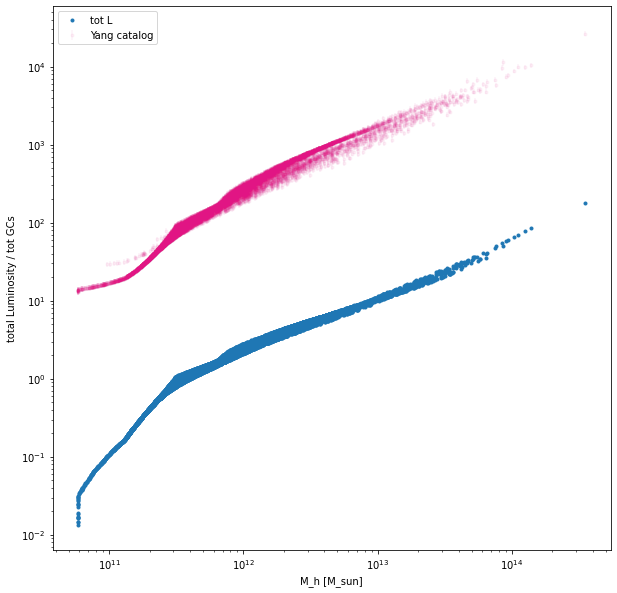

In [55]:
plt.figure(figsize=(10,10))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M_h [M_sun]')
plt.ylabel('total Luminosity / tot GCs')
plt.plot(M_group[i_plot], tot_L[i_plot],'.', label='tot L')
plt.errorbar(M_group[i_plot], tot_GC[i_plot], yerr =err_GC[i_plot], color = '#e11584' ,fmt ='.',alpha = 0.05,label='tot GC' )
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


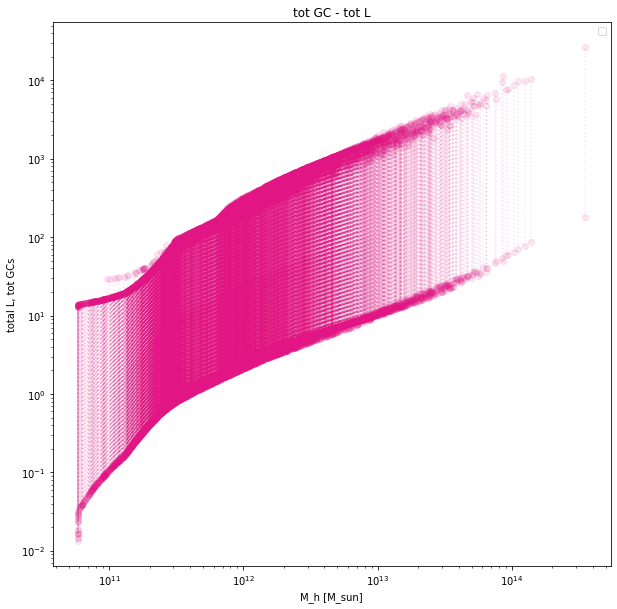

In [123]:
plt.figure(figsize=(10,10))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M_h [M_sun]')
plt.ylabel('total L, tot GCs')
plt.plot([M_group[i_plot],M_group[i_plot]], [tot_L[i_plot],tot_GC[i_plot]],'o:' ,color='#e11584',alpha=0.1)
plt.title('tot GC - tot L')
plt.legend()
plt.show()

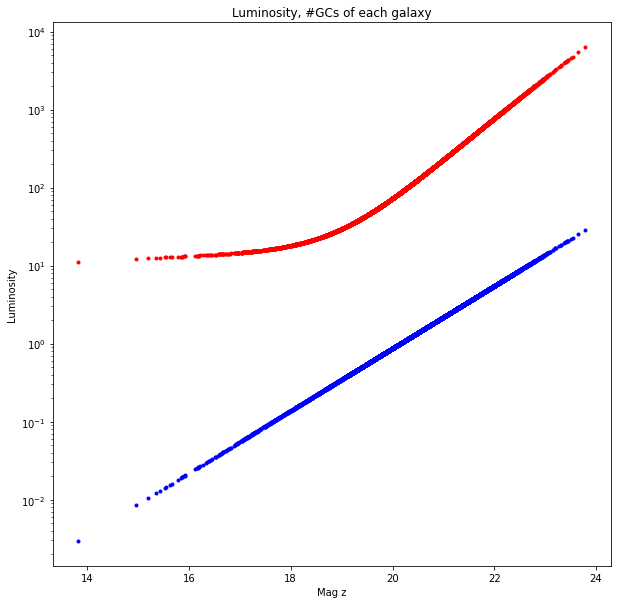

In [129]:
plt.figure(figsize=(10,10))
plt.semilogy(-M_z[i_plot],L[i_plot],'b.')
plt.semilogy(-M_Z2[i_plot],N_GC2[i_plot],'r.')
plt.xlabel('Mag z')
plt.ylabel('Luminosity')
plt.title('Luminosity, #GCs of each galaxy')
plt.show()

In [124]:
data6 = fits.getdata('/data/lemn/results/Yang_NGC_applied_model.fits')

In [125]:
M_Z2 = data6['Mag z']
N_GC2 = data6['NGCs']

 calculate N_GC at each M_h bin (from Oct 14)

In [46]:
#sort mass and other arrays in order of increasing mass, to divide into bins
arg_sort = np.argsort(M_group)

In [47]:
M_sort = M_group[arg_sort]
N_sort = tot_GC[arg_sort]
err_sort = err_GC[arg_sort]

In [48]:
#create the mass bin array
nbin = 101
M_bin = np.logspace(np.log10(M_sort[0]), np.log10(M_sort[len(M_sort)-1]),nbin)

In [49]:
N_mean = np.zeros(nbin-1)
M_mean = np.zeros(nbin-1)
std_mean = np.zeros(nbin-1)

In [50]:
j = 0
stop = -1
for i in range(0,len(M_sort)):
    start = stop + 1
    if M_sort[i] > M_bin[j]:   #take sum of all the points within mass bin, if point larger, move to next bins
        stop = i-1       
        N_mean[j] = np.mean(N_sort[start:stop])
        M_mean[j] = np.mean(M_sort[start:stop])
        std_mean[j] = np.std(N_sort[start:stop])
        j += 1
        #print(stop)
        
#last bin, for the remain points
start = stop + 1
stop = len(M_sort)
std_mean[j] = np.std(N_sort[start:stop])
N_mean[j] = np.mean(N_sort[start:stop])
M_mean[j] = np.mean(M_sort[start:stop])

/cluster/home/lemn/.conda/envs/project2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/cluster/home/lemn/.conda/envs/project2/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/cluster/home/lemn/.conda/envs/project2/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cluster/home/lemn/.conda/envs/project2/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cluster/home/lemn/.conda/envs/project2/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

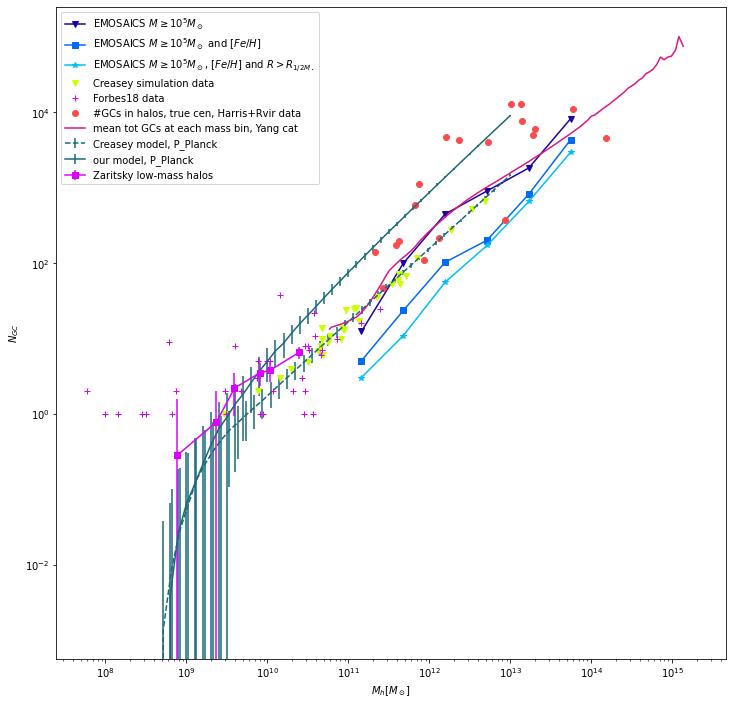

In [53]:

plt.figure(figsize=(12,12))
plt.xscale("log")
plt.yscale('log')

#plt.errorbar(M_mean, N_mean,yerr= std_mean, color = '#e11584',label='mean tot GCs at each mass bin, Yang cat')
plt.errorbar(M_mean, N_mean, color = '#e11584',label='mean tot GCs at each mass bin, Yang cat')

#plt.errorbar(M_halo_theo, N_GC_Mill_Creaseytheo,  yerr=err_N_GC_Mill_Creaseytheo,  color = '#a5c215', fmt='--',label='Creasey model, P_Mill')
plt.errorbar(M_halo_theo, N_GC_Planck_Creaseytheo,yerr=err_N_GC_Planck_Creaseytheo,color = '#186878', fmt='--',label='Creasey model, P_Planck')
#plt.errorbar(M_halo_theo, N_GC_COCO_Creaseytheo,  yerr=err_N_GC_COCO_Creaseytheo,  color = '#c23215', fmt='--',label='Creasey model, P_COCO WDM')
#plt.errorbar(M_halo_theo2,N_GC_Mill_ourtheo,      yerr=err_N_GC_Mill_ourtheo,      color = '#a5c215',label='our model, P_Mill')
plt.errorbar(M_halo_theo2,N_GC_Planck_ourtheo,    yerr=err_N_GC_Planck_ourtheo,    color = '#186878',label='our model, P_Planck')
#plt.errorbar(M_halo_theo2,N_GC_COCO_ourtheo,      yerr=err_N_GC_COCO_ourtheo,      color = '#c23215',label='our model, P_COCO WDM')

plt.errorbar(10**M_Z, 10**N_Z, yerr=10**err_Z, color='#dc00fe', fmt='s-', label ='Zaritsky low-mass halos')
plt.plot(mass_E, triangle, 'v-', color='#1b02a3', label = 'EMOSAICS $M \geq 10^5 M_\odot$')
plt.plot(mass_E, square,   's-', color='#006af9', label = 'EMOSAICS $M \geq 10^5 M_\odot$ and $[Fe/H]$')
plt.plot(mass_E, star,     '*-', color='#00c0f9', label = 'EMOSAICS $M \geq 10^5 M_\odot$, $[Fe/H]$ and $R > R_{1/2 M_\star}$')

plt.plot(M_Creasey, N_Creasey,'v', color= '#CCFF00',  label ='Creasey simulation data')
plt.plot(M_halo_F, N_GC_F, '+', color = '#dc00fe',    label ='Forbes18 data')
plt.plot(M_h_array[check2],sum_NGC[check2], 'o', color ='#fc4c4e' , label = '#GCs in halos, true cen, Harris+Rvir data')

plt.xlabel('$M_h [M_\odot]$')
plt.ylabel('$N_{GC}$')
plt.legend()
#plt.savefig('tot_GC_1sigma.pdf')
plt.show()